<a href="https://colab.research.google.com/github/Yxy-0/Signal_Theory/blob/main/Taller_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Epoch 1/1000
1/1 [==============================] - 0s 290ms/step - loss: 25.6589
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.1799
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0568
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 13/1000
1/1 [===========================

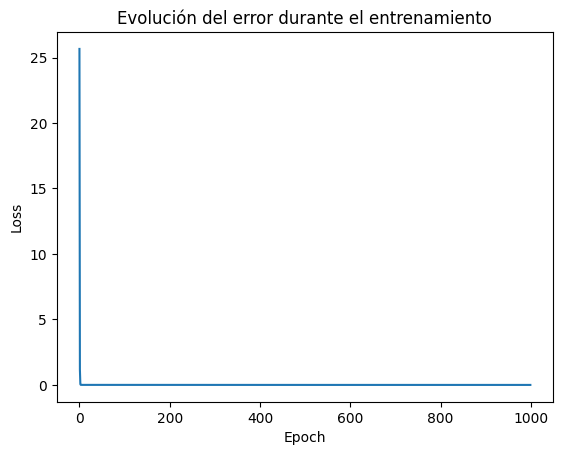

In [4]:
#Define datos de entremamiento
x_train = np.array([1,2,3,4,5,6,7,8,9,10])
y_train = np.array([2,4,6,8,10,12,14,16,18,20])

#Definimos el modelo en Keras
model = Sequential()
model.add(Dense(1, input_shape = (1,)))
model.compile(loss="mean_squared_error", optimizer = SGD(learning_rate=0.01))

#Entrena el modelo
history = model.fit(x_train, y_train, epochs=1000, verbose= 1)

#imprime el error final
losses = history.history['loss']

#grafica la evolución del error
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Evolución del error durante el entrenamiento")
plt.show()

1/1 [==============================] - 0s 75ms/step


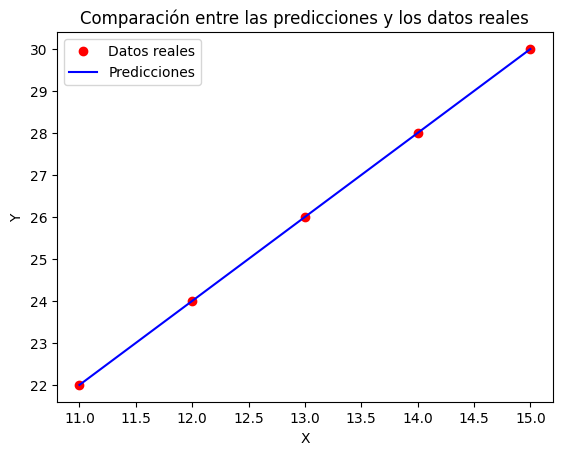

In [5]:
#Generamos predicciones y calculamos el error en un conjunto de prueba
x_test = np.array([11, 12, 13, 14, 15])
y_test = np.array([22, 24, 26, 28,30])
y_pred = model.predict(x_test)

mse = np.mean((y_test - y_pred.squeeze())**2)

#Graficamos lacomparación entre las predicciones y los datos reales
plt.plot(x_test, y_test, "ro", label="Datos reales")
plt.plot(x_test, y_pred, "b-", label="Predicciones")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Comparación entre las predicciones y los datos reales")
plt.show()

In [29]:
df=pd.read_csv('/content/exercise_data.csv')
df.head(10)                                   ##Se muestran las 10 primeras filas del dataframe

,distance,rhr,zone mins
0,4.69,69,0
1,3.26,69,7
2,9.05,69,59
3,7.88,65,80
4,10.00,63,67
5,8.28,65,65
6,4.44,65,10
7,2.60,65,4
8,5.90,63,50
9,9.97,62,57


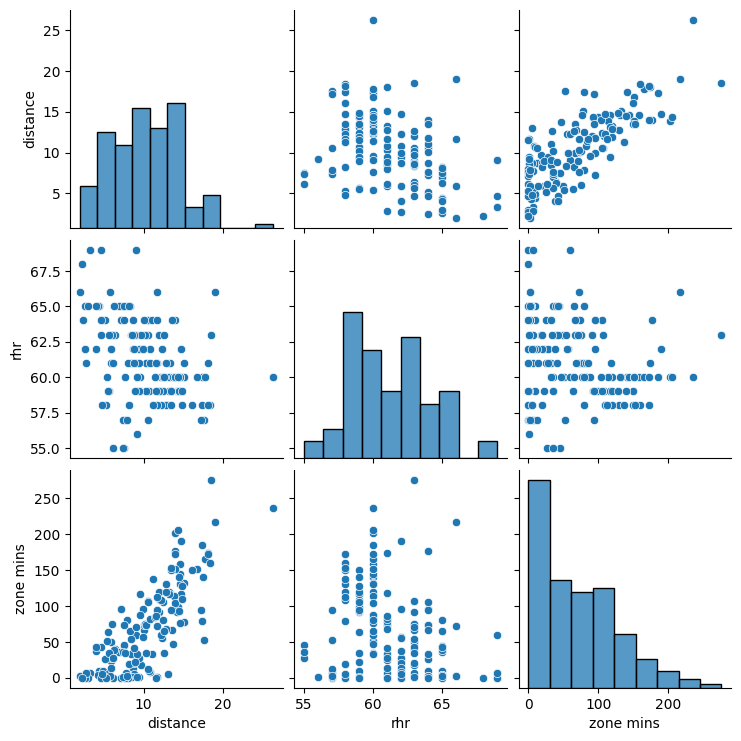

In [30]:
df = df.loc[:, ['distance','rhr','zone mins']]   #se seleccionan solo esas columnas para realizar el pairplot
sns.pairplot(df)
plt.show()

In [31]:
X = df['distance'].values.reshape(-1,1)              #Datos conocidos
y = df['zone mins'].values.reshape(-1,1)         #Se va a estimar las ganancias

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)        #Se definen los datos de entreno, prueba

In [32]:

regression = [SVR(),ElasticNet(),DecisionTreeRegressor(), RandomForestRegressor()]            #Se preseleccionan 4 diferentes modelos de regresión y se evaluará cual funciona mejor

score_matrix = [['SVR',0,0],
                ['ElasticNet',0,0],
                ['Tree',0,0],
                ['Forest',0,0]
]

In [33]:
from sklearn.model_selection import cross_val_score, KFold

i = 0

K = KFold(n_splits=10,shuffle=False)

for model in regression:
    scores = cross_val_score(estimator=model, X = X_train, y = y_train, cv = K)
    score_matrix[i][1] = scores.mean()
    score_matrix[i][2] = scores.std()
    i+=1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [34]:
score_matrix

[['SVR', 0.17160896576372406, 0.07820766802209478],
 ['ElasticNet', 0.5071754987986833, 0.26402875902051787],
 ['Tree', 0.10177789017345355, 0.6852922605420589],
 ['Forest', 0.319772664217278, 0.5346684735484415]]

In [35]:
model = ElasticNet()          #se seleccionó el modelo de regresión lineal decisionElasticNetRegressor porque fue el que mejor se ajustó
model.fit(X_train, y_train)             #Se entrena el modelo por medio de los datos Temperature y Ice Cream Profits

ElasticNet()

In [36]:
y_pred = model.predict(X_test)          #Por medio de lo que aprendió el modelo se hace la predicción con los datos que no conoce
print(np.shape(y_pred))
print(np.shape(X_test))

(50,)
(50, 1)


In [37]:
R=r2_score(y_test, y_pred)            #Se verifica el índice de correlación evaluar el rendimiento
print(R)

0.6527342364962715


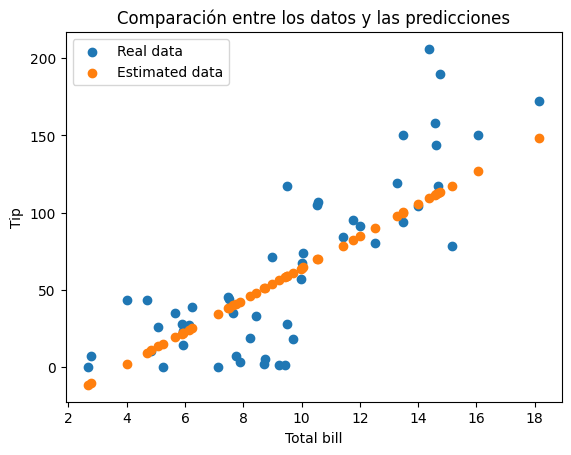

In [38]:
plt.scatter(X_test,y_test, label='Real data')
plt.scatter(X_test, y_pred, label='Estimated data')
plt.legend()
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.title("Comparación entre los datos y las predicciones")
plt.show()